## Datasets and Dataloaders
https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html
- pytorch의 tutorial 영상에 14:00분에 해당
- 아래에, TorchVision에서 바로 다운로드할 수 있는 오픈 액세스 데이터 세트 중 하나를 사용하여 모델에서 사용할 수 있도록 이미지를 변환하는 방법과 DataLoader를 사용하여 데이터 배치를 모델에 공급하는 방법을 보여드리겠습니다.

- 가장 먼저 해야 할 일은 들어오는 이미지를 PyTorch 텐서로 변환하는 것입니다.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

print(transform)

C:\Users\user\miniconda3\envs\mmcv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\miniconda3\envs\mmcv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\user\miniconda3\envs\mmcv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


- 여기에서, 우리는 인풋을 명시적으로 2가지 변환을 수행했다.
  - transforms.ToTensor() -> Pillow로 불러온 이미지들을 Pytorch tensors로 컨버트 했다.
  - transforms.Normalize() -> 평균은 0이고, 표준편차는 0.5인 tensor로 값들을 조정했다. 게다가 activation 함수가 가장 강력한 gradients인 x = 0을 가질 경우, 우리의 데이터가 중앙에 있을 경우 빠르게 학습할 수 있다.

- reflection과 rotation, centering, cropping를 포함해서, 다양한 변환들을 이용할 수 있다.
- 다음으로, 우리는 CIFAR10 데이터 셋에 인스턴스를 만들 수 있다. 이 데이터 셋은 10개의 object 클레스와 32 x 32 크기의 이미지 데이터 셋이다.
- 4개의 탈것(비행기, 자동차, 배, 트럭)과 6개의 동물(새, 고양이, 사슴, 개, 개구리, 말)로 구성되어져 있다.

In [2]:
## 데이터 셋 로드
trainset = torchvision.datasets.CIFAR10(root = "./data", train = True,
                                        download = True, transform = transform)

Files already downloaded and verified


- 위의 셀을 실행하면 데이터 세트가 다운로드되는 데 약간의 시간이 걸릴 수 있습니다.

- 위의 예제 코드는 Pytorch의 Object 데이터 셋을 만드는 과정이다.

- 다운로드 할 수 있는 데이터 셋(위 예제 코드에 CIFAR10 데이터 셋 처럼)들은 torch.utils.data.Dataset에 하위 분류 되어져 있다.

- Torch Audio와 Torchtext, TorchVision에 다운로드 할 수 있는 데이터 셋들은 Pytorch에 데이터 셋 클레스들을 포함하고 있으며, torchvision.datasets.ImageFolder와 같은 라벨이된 이미지에 폴더를 읽어 데이터 셋 클레스들의 유틸을 사용할 수 있다.

- 하위 분류되어져 있는 데이터 셋들 중 원하는 것을 만들 수 있습니다.

- 데이터 셋 인스턴스를 만들 때, 몇 가지 필요한 것들은 다음과 같습니다. :
    - root : 다운 받은 데이터를 받을 파일 시스템 경로 입니다.
    
    - train : 훈련에 이 세트를 사용하는지 여부 대부분의 데이터 세트는 훈련 및 테스트 데이터 셋으로 분할됩니다.
    - download : 데이터세트를 아직 다운로드하지 않은 경우 다운로드할지 여부.
    - transform : 데이터에 적용하려는 변환입니다.

In [3]:
## class 확인
print("class 확인:",trainset.classes)
print("class의 갯수 확인:",len(trainset.classes))

#  데이터 셋의 모양 확안
print("이미지 데이터 셋의 모양 확안:",trainset.data.shape, ", 순서:","(이미지 개수, width, height, chennel(RGB))")

## class의 idx 확인
print("class의 idx:", trainset.class_to_idx)

class 확인: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class의 갯수 확인: 10
이미지 데이터 셋의 모양 확안: (50000, 32, 32, 3) , 순서: (이미지 개수, width, height, chennel(RGB))
class의 idx: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


- 준비가된 데이터 셋을 데이터 로더에 할당 할 수 있다.

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 1,
                                         shuffle = True, num_workers = 2)

- 데이터 세트는 데이터에 접근하기 위해 하위 클래스로 포장하고, 제공하는 데이터 유형에 특화되어 있습니다.
- DataLoader는 데이터에 대해 아무것도 모르지만, Dataset에서 제공하는 입력 텐서를 사용자가 지정한 파라미터로 일괄 정리합니다.

- 위의 예에서, 우리는 데이터 로더에게 순서 상관 없이 랜덤(shuffle=True)하게 trainset으러 부터 4개의 이미지의 배치를 요구했고, 우리는 디스크로부터 데이터를 불러올 오고, 2개의 작업자로 스핀업 하도록 요구했다. 즉, cpu의 2개의 코어를 사용해서 GPU 데이터를 전달했다.

- 다음은 시각화 코드입니다.

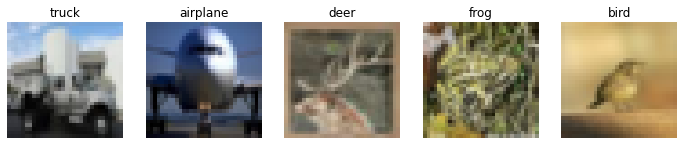

In [5]:
## 이미지 데이터 시각화
import numpy as np

label_seq = {0:'airplane',
             1:'automobile',
             2:'bird',
             3:'cat',
             4:'deer',
             5:'dog',
             6:'frog',
             7:'horse',
             8:'ship',
             9:'truck'}

plt.figure(figsize = (12, 12))

for i in range(5):
    index = np.random.randint(0, 50000)
    
    img = trainset.data[index,:,:,:]
    label_index = trainset.targets[index]
    label = label_seq[label_index]
    plt.subplot(1,5,i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(label)

plt.show()
